# Palmer Penguins Clustering

![Penguins](./res/penguins.png)

### Project Overview

This project focuses on the Palmer Penguins dataset, which includes various measurements of penguin species observed on three different islands in the Palmer Archipelago, Antarctica. The dataset comprises the following columns: 
- `species`: The species of the penguin (Adelie, Gentoo, Chinstrap).
- `island`: The island on which the penguin was observed (Torgersen, Biscoe, Dream).
- `culmen_length_mm`: The length of the penguin's bill (culmen) in millimeters.
- `culmen_depth_mm`: The depth of the penguin's bill in millimeters.
- `flipper_length_mm`: The length of the penguin's flipper in millimeters.
- `body_mass_g`: The body mass of the penguin in grams.
- `sex`: The sex of the penguin (male or female).

### Problem Statement

The goal of this project is to apply clustering techniques to group the penguins by species. Unlike supervised learning, where we have labels to guide the model, clustering is an unsupervised learning task that attempts to discover inherent groupings in the data based on the input features. By analyzing the clusters formed, we can gain insights into how the different species of penguins are naturally grouped according to their physical characteristics.

### Summary

In this project, we will explore and preprocess the Palmer Penguins dataset to prepare it for clustering analysis. We will then implement various clustering algorithms, such as K-Means and Hierarchical Clustering, to identify distinct groups within the dataset. The performance and validity of the clusters will be evaluated using appropriate metrics and visualization techniques. Ultimately, this project aims to demonstrate how clustering can be effectively used to discover natural groupings in biological data, potentially aiding in species identification and ecological research.


### Suppressing Warnings

1. **Importing the Warnings Module**:
   - `import warnings`:
     - The `warnings` module in Python is used to control how warning messages are displayed. Warnings are typically issued during runtime to alert the user about certain conditions in the code that may not necessarily be errors but could potentially lead to issues.

2. **Suppressing Warnings**:
   - `warnings.filterwarnings('ignore')`:
     - This line of code suppresses all warning messages that would normally be displayed. The `filterwarnings` function allows you to control which warnings are shown, modified, or ignored.
     - `'ignore'` is the action specified here, meaning all warnings will be ignored and not shown in the output.
   
### Purpose of Suppressing Warnings

- **Cleaner Output**: In some cases, warnings can clutter the output, especially in a Jupyter notebook or during presentations. Suppressing them helps maintain a clean and focused display.
- **Stability**: If you're confident that the warnings are not indicative of significant issues in the code, you might choose to suppress them to avoid distractions.
- **Common Use Case**: It's commonly used in data analysis or machine learning projects where certain library functions might generate warnings that are either irrelevant to the current task or are known issues that don't affect the analysis.

### Caution

- **Use with Care**: While suppressing warnings can make the output cleaner, it's important to ensure that you’re not ignoring warnings that could indicate potential problems in your code, such as deprecated functions, potential bugs, or other issues that might need attention.
- **Debugging**: If you're troubleshooting or debugging, it's usually better to allow warnings to be shown so that you can address any underlying issues they indicate.

In summary, this snippet is useful for keeping your output clean, especially in a polished presentation or report, but should be used judiciously to avoid overlooking important information.

In [66]:
import warnings
warnings.filterwarnings('ignore')

## Step 1: Data Exploration

### Loading and Previewing the Dataset

In this code snippet, we're doing the following:

1. **Loading the Palmer Penguins dataset**:
   - We use `pd.read_csv()` to read the CSV file `penguins_size.csv` from the `./data/` directory. The data is stored in a DataFrame named `df`.

2. **Previewing the Data**:
   - `df.head()` displays the first five rows of the DataFrame, giving us a quick look at the dataset's structure and content.

This allows us to load the data into memory and take an initial glance at what we’ll be working with.

In [67]:
import pandas as pd

# load the dataset
df = pd.read_csv(r'./res/penguins_size.csv')

# display the first few rows of the dataset
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


Performs several key steps to explore and understand the DataFrame `df`:

1. **Data Types and Summary Information**:
   - `df.info()`:
     - This command provides a summary of the DataFrame, including the number of entries, column names, data types, and the number of non-null values in each column.
     - It helps us quickly assess the structure of the data and identify any columns with missing values.

2. **Summary Statistics**:
   - `df.describe()`:
     - This function generates descriptive statistics for the numerical columns in the DataFrame, such as mean, standard deviation, minimum, and maximum values.
     - It gives us a quick overview of the distribution and central tendencies of the data.

3. **Checking for Missing Values**:
   - `df.isnull().sum()`:
     - This command checks for missing values in each column of the DataFrame by counting the number of `NaN` values.
     - The output is a series where each column name is paired with the total count of missing values, helping us identify any data quality issues.

Together, these commands provide a comprehensive initial understanding of the dataset, including its structure, statistical properties, and potential missing data.


In [68]:
# the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [69]:
# summary statistics
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [70]:
# check for missing values
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

# Step 2: Data Cleaning

### Cleaning the Data by Dropping Null Records

1. **Dropping Rows with Missing Values**:
   - `df_cleaned = df.dropna()`:
     - This command creates a new DataFrame, `df_cleaned`, by dropping all rows from `df` that contain any missing values (`NaN`).
     - This approach is taken for simplicity, especially when the number of missing records is small, and we can afford to lose those rows without significantly impacting the analysis.

2. **Verifying the Removal of Missing Values**:
   - `df_cleaned.isnull().sum()`:
     - This command checks the new DataFrame, `df_cleaned`, to ensure that all missing values have been removed. It returns a series with the count of `NaN` values for each column, which should now be zero for all columns.

### Reason for Cleaning Null Value Records

In this context, the decision to drop rows with missing values is driven by the following considerations:
- **Simplicity**: Dropping rows with missing data simplifies the dataset and avoids the complexities associated with handling or imputing missing values.
- **Minimal Impact**: If the number of missing records is small, removing them may not significantly affect the analysis or the performance of machine learning models.
- **Data Integrity**: Working with a complete dataset ensures that all rows have valid and consistent data across all columns, which can be particularly important in unsupervised learning tasks like clustering.

This approach is appropriate when the proportion of missing data is low and does not compromise the overall dataset.

In [71]:
# Dropping rows with missing values for simplicity
df_cleaned = df.dropna()

# Verifying that there are no missing values
df_cleaned.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

### Identifying Unique Values in Categorical Features

1. **Importing NumPy**:
   - `import numpy as np`:
     - We import the NumPy library, which provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.

2. **Iterating Over DataFrame Columns**:
   - `for feature in df_cleaned.columns:`:
     - We loop through each column (or feature) in the cleaned DataFrame `df_cleaned`.

3. **Checking for Categorical Features**:
   - `if df_cleaned[feature].dtype == np.object_:`:
     - This condition checks if the data type of the current column is `object`, which typically indicates a categorical feature in pandas.
     - If the feature is categorical, the code inside the `if` statement is executed.

4. **Printing Unique Values**:
   - `print(f'{feature}: {np.unique(df_cleaned[feature].values)}')`:
     - For each categorical feature, this line prints the feature name followed by the unique values present in that column.
     - `np.unique()` is a NumPy function that returns the sorted unique elements of an array, which, in this case, are the distinct categories in the column.

### Purpose of the Code

The purpose of this code is to identify and display the unique values of all categorical features in the DataFrame `df_cleaned`. This is useful for:
- Understanding the possible categories within each categorical feature, which can help in data exploration and preprocessing.
- Ensuring that there are no unexpected or incorrect values in categorical features, which could affect subsequent analysis or modeling.

By systematically checking each categorical feature, this code helps in gaining a clear overview of the categorical data present in the dataset.

In [72]:
import numpy as np

# get the unique values of categorical features
for feature in df_cleaned.columns:
    if df_cleaned[feature].dtype == np.object_:
        print(f'{feature}: {np.unique(df_cleaned[feature].values)}')

species: ['Adelie' 'Chinstrap' 'Gentoo']
island: ['Biscoe' 'Dream' 'Torgersen']
sex: ['.' 'FEMALE' 'MALE']


### Removing Invalid Values in the 'sex' Column

1. **Identifying Rows with Invalid Values**:
   - `df_cleaned[df_cleaned['sex'] == '.'].index`:
     - This part of the code filters the DataFrame `df_cleaned` to find rows where the value in the `sex` column is equal to `'.'`.
     - The `.index` attribute returns the index (or row labels) of these filtered rows.

2. **Dropping Rows with Invalid Values**:
   - `df_cleaned.drop(..., inplace=True)`:
     - The `drop()` function is used to remove the rows identified in the previous step from the DataFrame.
     - The `inplace=True` argument modifies the existing DataFrame `df_cleaned` directly, rather than creating a new one.

### Purpose of the Code

The purpose of this code is to clean the dataset by removing any rows where the `sex` column contains an invalid value, represented by `'.'`. This step is important because:
- Invalid or erroneous values in a categorical feature like `sex` can lead to incorrect analysis or model training.
- Ensuring that all values in the `sex` column are valid improves the overall quality and reliability of the data.

By dropping these rows, we maintain the integrity of the dataset, making it more suitable for further analysis or modeling.

In [73]:
# remove the invalid 'sex' column value
df_cleaned.drop(df_cleaned[df_cleaned['sex'] == '.'].index, inplace=True)

# Step 3: Data Visualization

### Visualizing Relationships Between Numerical Features by Species

1. **Importing Visualization Libraries**:
   - `import seaborn as sns`:
     - We import the Seaborn library, which is built on top of Matplotlib, for creating attractive and informative statistical graphics. Seaborn is particularly well-suited for data visualization tasks involving statistical relationships between features.
   - `import matplotlib.pyplot as plt`:
     - We import Matplotlib’s `pyplot` module, commonly used for creating a wide variety of plots and visualizations in Python.

2. **Ensuring Inline Plot Display**:
   - `%matplotlib inline`:
     - This is a magic command specific to Jupyter notebooks that ensures that plots are displayed directly below the code cell that produces them. It embeds the plots within the notebook, making them easier to view and analyze immediately after running the code.

3. **Creating a Pairplot**:
   - `sns.pairplot(df_cleaned, hue='species')`:
     - This command generates a pairplot using Seaborn. A pairplot is a grid of scatter plots that displays pairwise relationships between the numerical features in the DataFrame `df_cleaned`.
     - `hue='species'` colors the data points according to the penguin species. This allows us to easily observe how different species are distributed across various feature pairs.
     - Each diagonal plot shows the distribution of a single feature, while the off-diagonal plots show scatter plots of one feature against another, revealing potential correlations or separations between species.

4. **Displaying the Plot**:
   - `plt.show()`:
     - This command renders the pairplot on the screen, making it visible in the notebook’s output.

### Purpose of the Visualization

The purpose of this pairplot is to visually explore the relationships between the numerical features of the penguin dataset, with an emphasis on how these relationships differ by species. Specifically:
- **Species Differentiation**: By coloring the points according to species, we can visually assess how well-separated the species are across different feature pairs.
- **Feature Relationships**: The pairplot helps in identifying potential correlations between features, such as how culmen length might correlate with body mass across different species.
- **Distribution Insights**: The diagonal plots provide insights into the distribution of each individual feature (e.g., whether the distribution is skewed, bimodal, etc.), which can be useful for further analysis or preprocessing.

This visualization is a powerful tool for gaining a preliminary understanding of the dataset and identifying patterns that could inform further analysis or model selection.

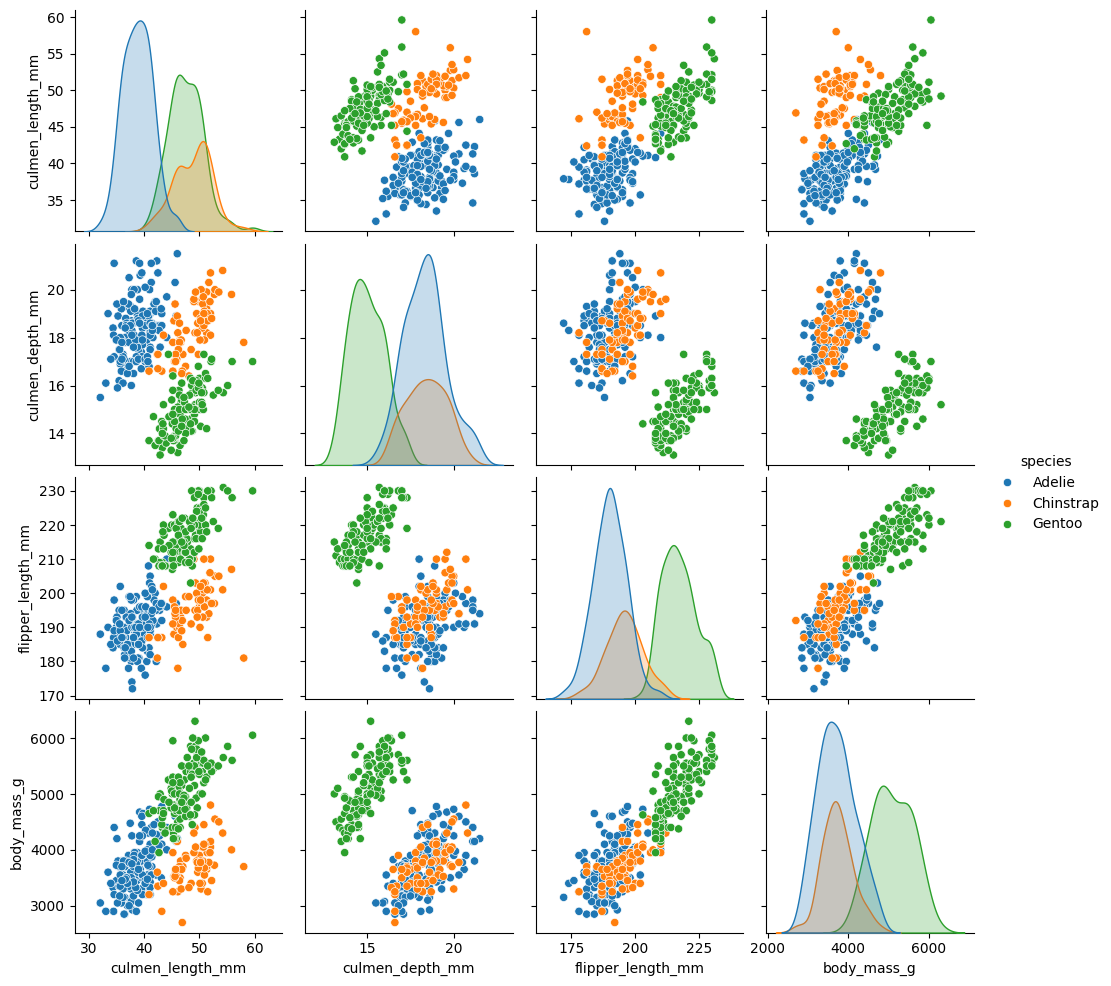

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# pairplot to visualize the relationships between numerical features, colored by species
sns.pairplot(df_cleaned, hue='species')
plt.show()

### Visualizing the Distribution of Penguin Species

1. **Creating a Countplot**:
   - `sns.countplot(data=df_cleaned, x='species')`:
     - This command generates a countplot using Seaborn, which is a type of bar plot that displays the count of observations in each categorical bin.
     - In this case, the countplot shows the distribution of the different penguin species in the cleaned DataFrame `df_cleaned`.
     - The `x='species'` parameter specifies that the species column should be used for the x-axis, where each species will have a corresponding bar representing the number of occurrences in the dataset.

2. **Displaying the Plot**:
   - `plt.show()`:
     - This command renders the countplot on the screen, making it visible in the output.

### Purpose of the Countplot

The countplot is useful for quickly understanding the distribution of categorical data—in this case, the species of penguins. By visualizing the number of penguins in each species category, we can:
- Assess the balance or imbalance of the species distribution within the dataset.
- Identify any potential bias in the data that might affect analysis or modeling.

This simple yet informative visualization helps provide an immediate sense of the dataset's composition with respect to the species.

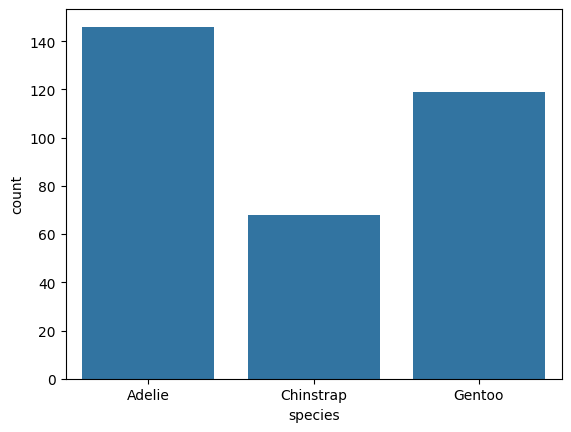

In [75]:
# countplot to visualize the distribution of species
sns.countplot(data=df_cleaned, x='species')
plt.show()

### Visualizing the Distribution of Numeric Features Across Species

1. **Iterating Over DataFrame Columns**:
   - `for feature in df_cleaned.columns:`:
     - This loop iterates through each column (or feature) in the cleaned DataFrame `df_cleaned`.

2. **Checking for Numeric Features**:
   - `if df_cleaned[feature].dtype == np.float64:`:
     - This condition checks if the data type of the current column is `float64`, which typically indicates a numeric feature in pandas.
     - If the feature is numeric, the code inside the `if` statement is executed.

3. **Creating a Boxplot**:
   - `sns.boxplot(data=df_cleaned, x='species', y=feature)`:
     - This command generates a boxplot using Seaborn to visualize the distribution of the numeric feature across the different penguin species.
     - The `x='species'` parameter specifies that the penguin species will be displayed on the x-axis.
     - The `y=feature` parameter specifies that the numeric feature will be displayed on the y-axis, with a separate boxplot for each species.

4. **Displaying the Plot**:
   - `plt.show()`:
     - This command renders the boxplot on the screen for each numeric feature, allowing us to visually inspect the distribution.

### Purpose of the Code

The purpose of this code is to create and display boxplots for each numeric feature in the dataset, segmented by penguin species. Boxplots are particularly useful for:
- **Visualizing Distribution**: They provide a summary of the distribution of data, including the median, quartiles, and potential outliers for each species.
- **Comparing Species**: By plotting numeric features against species, we can easily compare how these features vary across different species of penguins.
- **Identifying Patterns**: This visualization can help identify distinct patterns or differences in numeric features across species, which may be useful for clustering, classification, or further analysis.

By iterating over all numeric features, this code ensures that we get a comprehensive visual overview of how each numeric feature is distributed across the species.

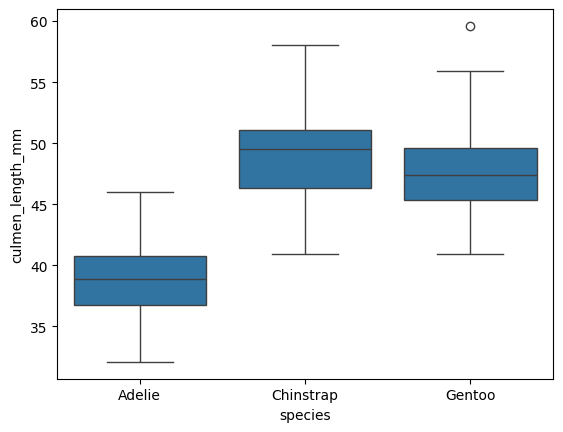

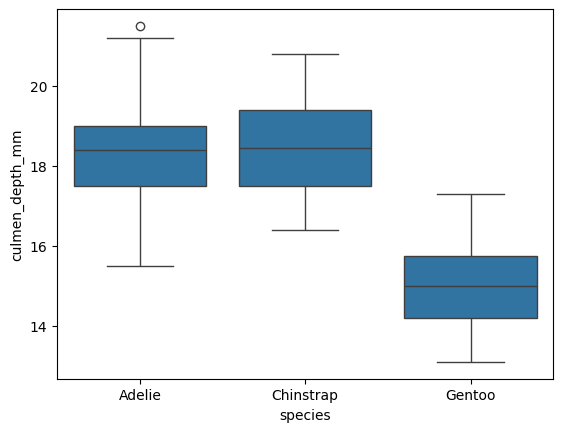

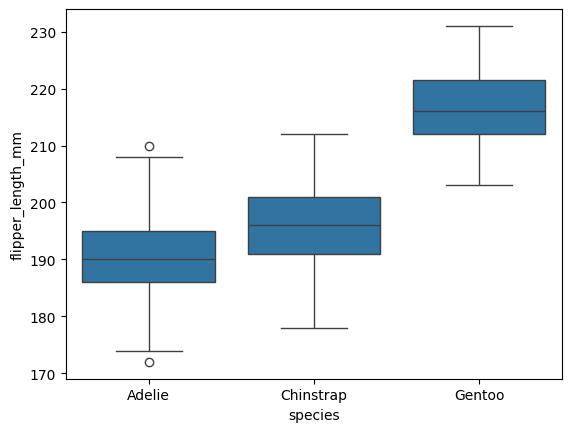

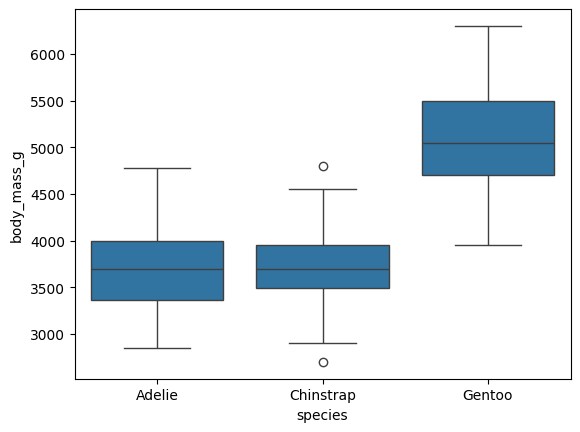

In [76]:
# boxplot to see the distribution of each numeric column across species
for feature in df_cleaned.columns:
    if df_cleaned[feature].dtype == np.float64:
        sns.boxplot(data=df_cleaned, x='species', y=feature)
        plt.show()

# Step 4: Data Preprocessing

### Preparing Data for Clustering

1. **Importing Necessary Modules**:
   - `from sklearn.preprocessing import StandardScaler, LabelEncoder`:
     - We import `StandardScaler` and `LabelEncoder` from `sklearn.preprocessing`. These tools are essential for preprocessing the data:
       - `LabelEncoder` is used to convert categorical values into numeric labels.
       - `StandardScaler` is used to standardize features by removing the mean and scaling to unit variance.

2. **Encoding Categorical Columns**:
   - `label_encoder = LabelEncoder()`:
     - We create an instance of `LabelEncoder` to handle the encoding of categorical data.
   
   - `df_cleaned['sex'] = label_encoder.fit_transform(df_cleaned['sex'])`:
     - The `sex` column, which contains categorical values like 'male' and 'female', is converted into numeric labels (e.g., 0 and 1). The `fit_transform()` method first learns the unique values and then transforms them into integers.
   
   - `df_cleaned['island'] = label_encoder.fit_transform(df_cleaned['island'])`:
     - Similarly, the `island` column, which contains the names of islands (e.g., 'Biscoe', 'Dream', 'Torgersen'), is also converted into numeric labels.

3. **Separating Features for Clustering**:
   - `features = df_cleaned.drop(columns=['species'])`:
     - We create a new DataFrame `features` by dropping the `species` column from `df_cleaned`. The `species` column is the target label and is not used in unsupervised clustering. The remaining columns will be used as features for clustering.

4. **Standardizing Features**:
   - `scaler = StandardScaler()`:
     - We create an instance of `StandardScaler` to standardize the features.
   
   - `features_scaled = scaler.fit_transform(features)`:
     - The `fit_transform()` method is applied to the `features` DataFrame. This method standardizes the data by subtracting the mean and scaling it to unit variance, ensuring that each feature contributes equally to the clustering algorithm. The standardized features are stored in `features_scaled`, which is a NumPy array.

### Purpose of the Code

The purpose of this code is to prepare the dataset for clustering by:
- **Encoding Categorical Variables**: Converting the `sex` and `island` columns from categorical text to numeric values, which is necessary because most machine learning algorithms require numeric input.
- **Standardizing Numeric Features**: Ensuring that all features have the same scale, which is crucial for clustering algorithms like K-Means that are sensitive to the scale of input data.

This preprocessing step is essential to ensure that the clustering model can effectively identify patterns and groupings within the data without being biased by the original scales of the features or the categorical nature of some variables.

In [77]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# encoding the 'sex' and 'island' columns
label_encoder = LabelEncoder()
df_cleaned['sex'] = label_encoder.fit_transform(df_cleaned['sex'])
df_cleaned['island'] = label_encoder.fit_transform(df_cleaned['island'])

# separating features for clustering
features = df_cleaned.drop(columns=['species'])
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 5: Clustering

### K-Means Clustering Implementation

1. **Importing the KMeans Class**:
   - `from sklearn.cluster import KMeans`:
     - We import the `KMeans` class from `sklearn.cluster`, which is used to perform K-Means clustering, a popular unsupervised machine learning algorithm.

2. **Initializing the K-Means Model**:
   - `kmeans = KMeans(n_clusters=3, random_state=42)`:
     - We create an instance of the `KMeans` class with the following parameters:
       - `n_clusters=3`: Specifies the number of clusters we want the algorithm to find. Since there are three penguin species in the dataset, we set the number of clusters to 3.
       - `random_state=42`: Ensures that the results are reproducible by setting a seed for the random number generator.

3. **Fitting the Model and Predicting Cluster Labels**:
   - `kmeans_labels = kmeans.fit_predict(features_scaled)`:
     - The `fit_predict()` method is applied to the standardized features (`features_scaled`), which performs two actions:
       - **Fit**: The K-Means algorithm learns the cluster centers from the data.
       - **Predict**: The algorithm assigns each data point to the nearest cluster center, returning an array of cluster labels.
     - The resulting array `kmeans_labels` contains the cluster assignments (0, 1, or 2) for each data point.

4. **Adding Cluster Labels to the DataFrame**:
   - `df_cleaned['kmeans_cluster'] = kmeans_labels`:
     - The cluster labels obtained from K-Means are added as a new column `kmeans_cluster` to the `df_cleaned` DataFrame. Each row now includes the cluster assignment, indicating which of the three clusters the corresponding penguin belongs to.

### Purpose of the Code

The purpose of this code is to apply the K-Means clustering algorithm to the penguin dataset and assign each penguin to one of three clusters. This process involves:
- **Identifying Clusters**: Using K-Means to find natural groupings within the data based on the features provided.
- **Labeling Data Points**: Assigning each data point (penguin) to a cluster, allowing us to analyze how well the clustering corresponds to the actual species of penguins.

By adding the cluster labels back into the DataFrame, we can further analyze the clustering results, such as by comparing the assigned clusters to the actual species or visualizing the clusters.

In [78]:
from sklearn.cluster import KMeans

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(features_scaled)
df_cleaned['kmeans_cluster'] = kmeans_labels

### Hierarchical Clustering Implementation

1. **Importing the AgglomerativeClustering Class**:
   - `from sklearn.cluster import AgglomerativeClustering`:
     - We import the `AgglomerativeClustering` class from `sklearn.cluster`, which is used to perform hierarchical (or agglomerative) clustering. This is a type of unsupervised learning algorithm that builds clusters by recursively merging or splitting them.

2. **Initializing the Hierarchical Clustering Model**:
   - `hc = AgglomerativeClustering(n_clusters=3)`:
     - We create an instance of the `AgglomerativeClustering` class with the following parameter:
       - `n_clusters=3`: Specifies the number of clusters we want the algorithm to form. Similar to K-Means, we set this to 3 because there are three species of penguins in the dataset.

3. **Fitting the Model and Predicting Cluster Labels**:
   - `hc_labels = hc.fit_predict(features_scaled)`:
     - The `fit_predict()` method is applied to the standardized features (`features_scaled`). This method performs two actions:
       - **Fit**: The algorithm builds the hierarchical clustering tree (dendrogram) by iteratively merging clusters based on their similarity.
       - **Predict**: Once the tree is formed, it cuts the tree at a height that yields the specified number of clusters (3 in this case) and assigns each data point to one of these clusters.
     - The resulting array `hc_labels` contains the cluster assignments (0, 1, or 2) for each data point.

4. **Adding Cluster Labels to the DataFrame**:
   - `df_cleaned['hc_cluster'] = hc_labels`:
     - The cluster labels obtained from the hierarchical clustering are added as a new column `hc_cluster` to the `df_cleaned` DataFrame. Each row now includes the cluster assignment, indicating which of the three clusters the corresponding penguin belongs to according to the hierarchical clustering algorithm.

### Purpose of the Code

The purpose of this code is to apply hierarchical clustering to the penguin dataset and assign each penguin to one of three clusters. This process involves:
- **Building a Dendrogram**: Hierarchical clustering forms a tree-like structure that shows how clusters are merged at various levels of similarity.
- **Assigning Cluster Labels**: The data points are then assigned to clusters based on this hierarchical structure, with the number of clusters specified by the `n_clusters` parameter.

By adding the cluster labels back into the DataFrame, we can compare the results of hierarchical clustering with those from other clustering methods (such as K-Means) and analyze how well the clusters correspond to the actual species.

In [79]:
from sklearn.cluster import AgglomerativeClustering

# Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters=3)
hc_labels = hc.fit_predict(features_scaled)
df_cleaned['hc_cluster'] = hc_labels

### DBSCAN Clustering Implementation

1. **Importing the DBSCAN Class**:
   - `from sklearn.cluster import DBSCAN`:
     - We import the `DBSCAN` class from `sklearn.cluster`, which is used to perform DBSCAN (Density-Based Spatial Clustering of Applications with Noise). DBSCAN is a density-based clustering algorithm that groups together points that are closely packed together, and it marks points that lie alone in low-density regions as outliers.

2. **Initializing the DBSCAN Model**:
   - `dbscan = DBSCAN(eps=0.5, min_samples=5)`:
     - We create an instance of the `DBSCAN` class with the following key parameters:
       - `eps=0.5`: This defines the maximum distance between two points for one to be considered as in the neighborhood of the other. It is a crucial parameter that determines the size of the clusters.
       - `min_samples=5`: This specifies the minimum number of data points that must be within the `eps` distance for a point to be considered a core point and form a cluster. If fewer points are within this distance, the point is labeled as noise.

3. **Fitting the Model and Predicting Cluster Labels**:
   - `dbscan_labels = dbscan.fit_predict(features_scaled)`:
     - The `fit_predict()` method is applied to the standardized features (`features_scaled`). This method performs two actions:
       - **Fit**: The DBSCAN algorithm identifies clusters by finding core points that have at least `min_samples` points within `eps` distance and then expands clusters from these core points.
       - **Predict**: Each point is assigned a cluster label. Points that do not belong to any cluster (i.e., those considered as noise) are typically labeled as `-1`.
     - The resulting array `dbscan_labels` contains the cluster assignments for each data point, with `-1` indicating points classified as noise (outliers).

4. **Adding Cluster Labels to the DataFrame**:
   - `df_cleaned['dbscan_cluster'] = dbscan_labels`:
     - The cluster labels obtained from the DBSCAN algorithm are added as a new column `dbscan_cluster` to the `df_cleaned` DataFrame. Each row now includes the cluster assignment, which indicates which cluster the corresponding penguin belongs to, or `-1` if the point is considered noise.

### Purpose of the Code

The purpose of this code is to apply the DBSCAN clustering algorithm to the penguin dataset and assign each penguin to a cluster or mark it as noise. This process involves:
- **Density-Based Clustering**: DBSCAN is particularly effective for identifying clusters of varying shapes and sizes, as well as detecting outliers, making it different from algorithms like K-Means or hierarchical clustering.
- **Noise Detection**: Unlike other clustering algorithms, DBSCAN can identify points that do not fit well into any cluster, labeling them as noise (`-1`).

By adding the DBSCAN cluster labels back into the DataFrame, we can further analyze the results and compare them with those from other clustering methods. This helps us understand the data's structure, including the presence of outliers and the density-based clusters.

In [80]:
from sklearn.cluster import DBSCAN

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(features_scaled)
df_cleaned['dbscan_cluster'] = dbscan_labels

# Step 6: Evaluation

### Visualizing K-Means Clusters

1. **Creating a Scatter Plot**:
   - `sns.scatterplot(data=df_cleaned, x='culmen_length_mm', y='culmen_depth_mm', hue='kmeans_cluster', palette='viridis')`:
     - This command generates a scatter plot using Seaborn to visualize the K-Means clustering results.
     - `data=df_cleaned`: Specifies that the data to be used comes from the `df_cleaned` DataFrame.
     - `x='culmen_length_mm'` and `y='culmen_depth_mm'`: These parameters set the x and y axes to represent the culmen length and culmen depth of the penguins, respectively.
     - `hue='kmeans_cluster'`: Colors the data points based on the K-Means cluster labels. Each cluster will be represented by a different color, allowing us to easily distinguish between them.
     - `palette='viridis'`: Specifies the color palette used for the plot. The 'viridis' palette is a perceptually uniform color map, making it a good choice for visualizing clusters.

2. **Adding a Title**:
   - `plt.title('K-Means Clustering')`:
     - Adds a title to the plot, which provides context for what is being visualized.

3. **Displaying the Plot**:
   - `plt.show()`:
     - This command renders the scatter plot on the screen, making it visible in the output.

### Purpose of the Visualization

The purpose of this scatter plot is to visually represent the clusters formed by the K-Means algorithm. Specifically:
- **Cluster Separation**: By plotting the culmen length against culmen depth and coloring points according to their cluster assignment, we can observe how well the K-Means algorithm has separated the data into distinct clusters.
- **Interpretability**: This visualization helps in understanding how the clusters relate to specific features (in this case, culmen length and depth), providing insights into the characteristics that define each cluster.
- **Evaluation**: By visually inspecting the plot, we can evaluate whether the clusters make sense and if they align with our expectations or known categories (such as species).

This plot is a crucial step in analyzing the effectiveness of the K-Means clustering and understanding the underlying structure of the data.

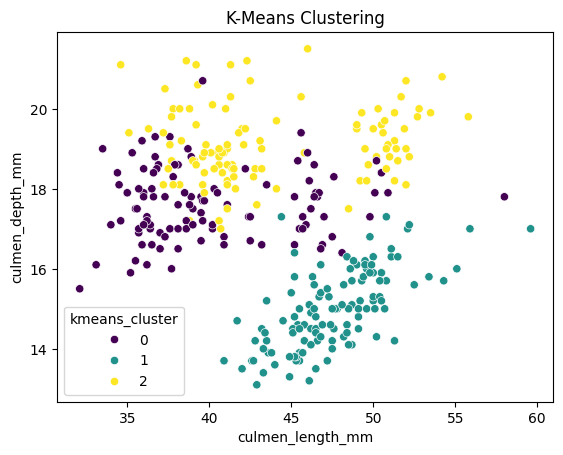

In [81]:
# visualizing K-Means Clusters
sns.scatterplot(data=df_cleaned, x='culmen_length_mm', y='culmen_depth_mm', hue='kmeans_cluster', palette='viridis')
plt.title('K-Means Clustering')
plt.show()

### Above Scatter Plot Explanation: K-Means Clustering

K-Means clustering algorithm on the penguin dataset, with the following details:

1. **Axes**:
   - **X-Axis (`culmen_length_mm`)**: Represents the culmen length (bill length) of the penguins in millimeters.
   - **Y-Axis (`culmen_depth_mm`)**: Represents the culmen depth (bill depth) of the penguins in millimeters.

2. **Clusters**:
   - The data points are colored according to the cluster labels assigned by the K-Means algorithm. In this case, three clusters are identified, corresponding to three different colors:
     - **Cluster 0** (Purple): Represents one of the clusters found by K-Means.
     - **Cluster 1** (Yellow): Represents another cluster.
     - **Cluster 2** (Teal): Represents the third cluster.

3. **Interpretation**:
   - The plot shows that the K-Means algorithm has effectively grouped the penguins into three distinct clusters based on their culmen length and culmen depth measurements.
   - **Cluster 2 (Teal)**: This cluster seems to group penguins with longer culmen lengths and shallower culmen depths.
   - **Cluster 0 (Purple)**: This cluster includes penguins with shorter culmen lengths and slightly deeper culmen depths.
   - **Cluster 1 (Yellow)**: This cluster overlaps partially with the other two but generally includes penguins with moderate culmen lengths and depths.
   - There is some overlap between clusters 0 and 1, indicating that these features alone may not completely separate all species, but the clustering still reveals meaningful groupings.

### Insights:
- **Cluster Separation**: The plot shows that K-Means has identified groups within the data, but there is some overlap, particularly between clusters 0 and 1, suggesting that additional features or a different clustering method might be needed to improve separation.
- **Feature Importance**: The culmen length and depth are effective features for distinguishing some of the clusters, particularly for the teal cluster, which is more distinct.

This plot is a valuable tool for visually assessing the quality of the clustering and understanding the relationships between the features and the identified clusters.

### Visualizing Hierarchical Clustering

1. **Creating a Scatter Plot**:
   - `sns.scatterplot(data=df_cleaned, x='culmen_length_mm', y='culmen_depth_mm', hue='hc_cluster', palette='viridis')`:
     - This command generates a scatter plot using Seaborn to visualize the results of hierarchical clustering.
     - `data=df_cleaned`: Specifies that the data for the plot comes from the `df_cleaned` DataFrame.
     - `x='culmen_length_mm'` and `y='culmen_depth_mm'`: These parameters set the x-axis and y-axis to represent the culmen length and culmen depth of the penguins, respectively.
     - `hue='hc_cluster'`: Colors the data points based on the cluster labels assigned by the hierarchical clustering algorithm. Each cluster is represented by a different color.
     - `palette='viridis'`: Specifies the color palette used for the plot, where the 'viridis' palette provides a visually appealing range of colors, making it easier to distinguish between clusters.

2. **Adding a Title**:
   - `plt.title('Hierarchical Clustering')`:
     - Adds a title to the plot, indicating that the visualization represents the results of hierarchical clustering.

3. **Displaying the Plot**:
   - `plt.show()`:
     - This command renders the scatter plot on the screen, making it visible in the output.

### Purpose of the Visualization

The purpose of this scatter plot is to visually represent the clusters formed by the hierarchical clustering algorithm. Specifically:
- **Cluster Separation**: By plotting the culmen length against culmen depth and coloring points according to their hierarchical cluster assignment, we can observe how well the hierarchical clustering algorithm has grouped the data into distinct clusters.
- **Interpretability**: This visualization helps in understanding how the hierarchical clustering algorithm has grouped the data, particularly in relation to the culmen length and depth features.
- **Evaluation**: By visually inspecting the plot, we can evaluate whether the clusters make sense and how they compare to the clusters identified by other methods, such as K-Means.

### Key Differences from K-Means Clustering

- **Algorithm Type**: Hierarchical clustering builds a tree (dendrogram) of clusters, which is different from K-Means, which partitions the data into a predetermined number of clusters.
- **Cluster Formation**: The hierarchical method may form clusters that are more dependent on the density and structure of the data rather than merely minimizing the distance within clusters, as in K-Means.
- **Visual Analysis**: Comparing this plot with the K-Means clustering plot can provide insights into how different algorithms group the data and whether the clusters are consistent across methods.

This plot is essential for analyzing the effectiveness of the hierarchical clustering and understanding how the algorithm interprets the relationships between the data points based on their features.

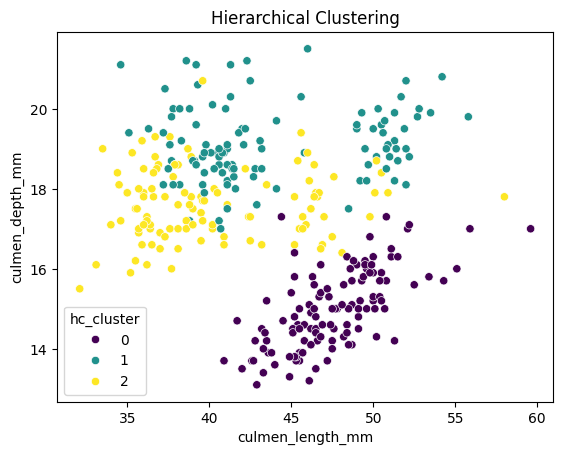

In [82]:
# visualizing Hierarchical Clustering
sns.scatterplot(data=df_cleaned, x='culmen_length_mm', y='culmen_depth_mm', hue='hc_cluster', palette='viridis')
plt.title('Hierarchical Clustering')
plt.show()

### Above Scatter Plot Explanation: Hierarchical Clustering

Hierarchical clustering algorithm applied to the penguin dataset, with the following details:

1. **Axes**:
   - **X-Axis (`culmen_length_mm`)**: Represents the culmen length (bill length) of the penguins in millimeters.
   - **Y-Axis (`culmen_depth_mm`)**: Represents the culmen depth (bill depth) of the penguins in millimeters.

2. **Clusters**:
   - The data points are colored according to the cluster labels assigned by the hierarchical clustering algorithm. In this plot, three clusters are identified, corresponding to three different colors:
     - **Cluster 0** (Purple): Represents one of the clusters identified by hierarchical clustering.
     - **Cluster 1** (Teal): Represents another distinct cluster.
     - **Cluster 2** (Yellow): Represents the third cluster.

3. **Interpretation**:
   - The plot shows that the hierarchical clustering algorithm has grouped the penguins into three distinct clusters based on their culmen length and culmen depth measurements.
   - **Cluster 0 (Purple)**: This cluster includes penguins with moderate culmen lengths and shallower culmen depths, forming a relatively compact group in the lower right section of the plot.
   - **Cluster 1 (Teal)**: This cluster generally represents penguins with longer culmen lengths and deeper culmen depths, occupying the upper-right and middle sections of the plot.
   - **Cluster 2 (Yellow)**: This cluster primarily contains penguins with shorter culmen lengths and a wider range of culmen depths, scattered across the upper-left and middle sections of the plot.
   - The clusters appear more distinctly separated compared to what might be seen with K-Means clustering, particularly between the purple cluster and the others.

### Insights:
- **Cluster Separation**: The plot shows that hierarchical clustering has identified fairly well-separated groups within the data. The clusters formed by hierarchical clustering appear to be more distinct, especially when looking at the purple cluster, which seems to have a clear boundary from the other clusters.
- **Feature Relationship**: This visualization suggests that culmen length and depth are effective features for distinguishing between different groups of penguins, particularly when using hierarchical clustering.
- **Comparison to K-Means**: If you compare this plot with a similar plot from K-Means clustering, you might notice differences in how the data points are grouped. Hierarchical clustering often captures the natural hierarchy in the data, which can result in different cluster shapes and boundaries.

This scatter plot is a powerful tool for visually assessing the quality of the hierarchical clustering and understanding the relationships between the features and the identified clusters.

### Visualizing DBSCAN Clustering

1. **Creating a Scatter Plot**:
   - `sns.scatterplot(data=df_cleaned, x='culmen_length_mm', y='culmen_depth_mm', hue='dbscan_cluster', palette='viridis')`:
     - This command generates a scatter plot using Seaborn to visualize the results of the DBSCAN clustering algorithm.
     - `data=df_cleaned`: Specifies that the data for the plot comes from the `df_cleaned` DataFrame.
     - `x='culmen_length_mm'` and `y='culmen_depth_mm'`: These parameters set the x-axis and y-axis to represent the culmen length and culmen depth of the penguins, respectively.
     - `hue='dbscan_cluster'`: Colors the data points based on the cluster labels assigned by the DBSCAN algorithm. Each cluster is represented by a different color. Points that are identified as noise (outliers) by DBSCAN are usually labeled as `-1` and may be displayed in a separate color or as black points.
     - `palette='viridis'`: Specifies the color palette used for the plot, where the 'viridis' palette provides a visually appealing range of colors, making it easier to distinguish between clusters.

2. **Adding a Title**:
   - `plt.title('DBSCAN Clustering')`:
     - Adds a title to the plot, indicating that the visualization represents the results of the DBSCAN clustering algorithm.

3. **Displaying the Plot**:
   - `plt.show()`:
     - This command renders the scatter plot on the screen, making it visible in the output.

### Purpose of the Visualization

The purpose of this scatter plot is to visually represent the clusters formed by the DBSCAN algorithm. Specifically:
- **Cluster Identification**: By plotting the culmen length against culmen depth and coloring points according to their DBSCAN cluster assignment, we can observe how DBSCAN has grouped the data into clusters and identified outliers (noise).
- **Interpretability**: This visualization helps in understanding the density-based clustering process of DBSCAN and how it distinguishes between dense regions (clusters) and sparse regions (noise).
- **Evaluation**: By visually inspecting the plot, we can evaluate the effectiveness of DBSCAN in identifying meaningful clusters, particularly in relation to the distribution of features like culmen length and depth.

### Key Characteristics of DBSCAN Clustering

- **Density-Based Clustering**: DBSCAN is different from algorithms like K-Means and hierarchical clustering as it focuses on the density of data points. It groups points that are closely packed together and marks points in low-density regions as outliers.
- **Noise Detection**: DBSCAN is particularly useful for identifying noise or outliers in the data, which can be observed in the plot as points not belonging to any major cluster.

### Insights from the Plot

- **Cluster Formation**: The clusters formed by DBSCAN might differ from those formed by other algorithms because DBSCAN doesn’t require pre-specifying the number of clusters and can identify clusters of arbitrary shapes.
- **Outliers**: Points labeled as outliers (if any) will appear separate from the main clusters, helping to identify any anomalies in the data.
- **Cluster Shapes**: DBSCAN can capture more complex, non-linear cluster shapes compared to algorithms like K-Means.

This plot is essential for understanding how DBSCAN interprets the structure of the data and how effectively it identifies clusters and outliers.

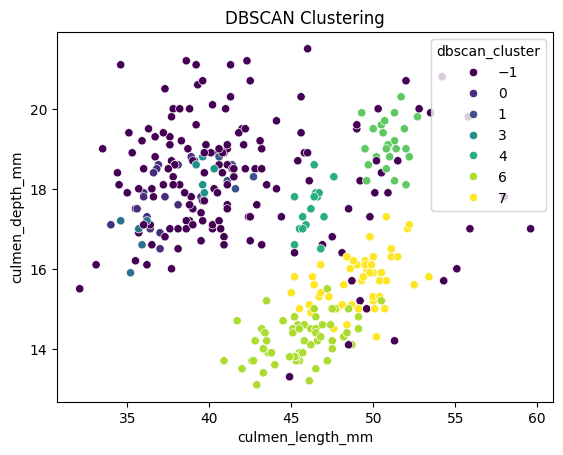

In [83]:
# visualizing DBSCAN Clustering
sns.scatterplot(data=df_cleaned, x='culmen_length_mm', y='culmen_depth_mm', hue='dbscan_cluster', palette='viridis')
plt.title('DBSCAN Clustering')
plt.show()

### Above Scatter Plot Explanation: DBSCAN Clustering

DBSCAN clustering algorithm applied to the penguin dataset. Here’s what the plot represents:

1. **Axes**:
   - **X-Axis (`culmen_length_mm`)**: Represents the culmen length (bill length) of the penguins in millimeters.
   - **Y-Axis (`culmen_depth_mm`)**: Represents the culmen depth (bill depth) of the penguins in millimeters.

2. **Clusters**:
   - The data points are colored based on the cluster labels assigned by the DBSCAN algorithm. Each cluster is represented by a different color, and there is a specific label for noise:
     - **Cluster -1 (Light Purple)**: These are points labeled as noise by DBSCAN, meaning they do not belong to any cluster based on the density criteria.
     - **Clusters 0, 1, 3, 4, 6, 7**: These are the main clusters identified by DBSCAN, each represented by a different color (e.g., purple, blue, teal, green, yellow).

3. **Interpretation**:
   - **Noise Detection**: DBSCAN identified a significant number of data points as noise (`-1`), which are scattered across the plot and do not fit well into any of the detected clusters. These points could be considered outliers or anomalies in the dataset.
   - **Cluster Formation**: DBSCAN identified multiple clusters, some of which might overlap with each other. For instance:
     - **Cluster 0 (Purple)** seems to include a large number of points, particularly in the upper-left region of the plot.
     - **Cluster 7 (Yellow)** and **Cluster 4 (Green)** are mainly located in the lower-right area, suggesting different groupings within the penguins based on culmen length and depth.
   - **Overlapping Clusters**: The presence of multiple clusters indicates that DBSCAN has identified areas of varying density in the data. However, the clusters are not as distinct as those formed by algorithms like K-Means or Hierarchical Clustering, reflecting the complexity of the data structure.

### Insights:
- **Cluster Identification**: The plot shows that DBSCAN has identified several clusters of varying shapes and densities. This reflects DBSCAN’s ability to capture more complex data structures compared to other clustering algorithms.
- **Noise and Outliers**: A noticeable feature of DBSCAN is its ability to label points that do not belong to any cluster as noise. These noise points (`-1`) are scattered throughout the plot, highlighting potential outliers in the dataset.
- **Comparison with Other Clustering Methods**: Unlike K-Means, which forces the data into a fixed number of clusters, DBSCAN has identified a more varied set of clusters, with the ability to detect noise. This can be particularly useful in datasets with irregular cluster shapes or when outliers are present.

This plot is a valuable tool for visually assessing the effectiveness of the DBSCAN algorithm in identifying clusters and detecting noise, especially when compared to other clustering methods like K-Means or Hierarchical Clustering.

# Summary and Conclusion: Comparing Clustering Techniques

After analyzing the three scatter plots representing K-Means, Hierarchical, and DBSCAN clustering results on the penguin dataset, here is a comparative summary and conclusion:

#### 1. **K-Means Clustering**
   - **Clusters**: K-Means identified three distinct clusters, as expected, which generally correspond to different groupings of penguins based on their culmen length and depth.
   - **Cluster Shape**: The clusters are spherical due to the algorithm's nature, with fairly clear separation between two of the clusters, but some overlap exists.
   - **Limitations**: K-Means forces the data into exactly three clusters, which may not always reflect the true underlying structure of the data, especially if the clusters are not spherical.

#### 2. **Hierarchical Clustering**
   - **Clusters**: Hierarchical clustering also identified three clusters, which appear to be more distinct and well-separated compared to K-Means.
   - **Cluster Shape**: The clusters reflect the natural hierarchy in the data, leading to a more meaningful separation, particularly for one cluster that is well-defined.
   - **Flexibility**: This method allows for understanding the data's structure at different levels of granularity, which is helpful for datasets where natural hierarchies exist.

#### 3. **DBSCAN Clustering**
   - **Clusters**: DBSCAN identified multiple clusters and a significant amount of noise (outliers). The clusters formed by DBSCAN are of varying shapes and sizes, reflecting the density-based nature of the algorithm.
   - **Noise Detection**: A key advantage of DBSCAN is its ability to identify outliers, which other algorithms might force into a cluster. This provides a more nuanced understanding of the data.
   - **Cluster Shape**: Unlike K-Means and Hierarchical clustering, DBSCAN can identify non-spherical clusters, making it more versatile for datasets with irregular cluster shapes.

### Conclusion: Best Clustering Technique for This Dataset

- **K-Means**: While straightforward and effective in cases where clusters are well-separated and spherical, K-Means may not be the best choice for this dataset due to its forced partitioning and inability to handle noise or non-spherical clusters effectively.
  
- **Hierarchical Clustering**: Hierarchical clustering offers a better representation of the data's natural structure, with well-defined clusters. It's particularly useful if you are interested in the relationships between clusters at different levels of detail. However, it does not handle noise as well as DBSCAN.

- **DBSCAN**: DBSCAN stands out as the best clustering technique for this dataset. It not only captures clusters of arbitrary shapes but also effectively identifies noise and outliers. This provides a more accurate representation of the data, especially when dealing with datasets that have varying densities and potential outliers.

**Recommendation**: **DBSCAN** is the most suitable clustering technique for the penguin dataset. It offers greater flexibility in identifying clusters of varying shapes and sizes while also detecting outliers, which leads to a more comprehensive understanding of the dataset's structure.